In [1]:
import pandas as pd
import numpy as np
from numpy.random import choice
from pandas import Series, DataFrame

In [2]:
%matplotlib inline

In [3]:
import matplotlib 
matplotlib.rcParams["font.size"] = 16

In [4]:
# ignore this cell - it makes the emphasized text red and uses the full width of the screen
from IPython.core.display import HTML
HTML('<style>em { color: red; }</style> <style>.container {width:100% !important; }</style>')

<img src="coins.png">

## Which sequence of coins was generated *randomly*?  Which was *handpicked* with the goal of tricking you?

In [5]:
# Write your guess in this cell
2

2

----
### Random selection from a list

In [6]:
#choice([<option1>, <option2> <...>])
choice(["rock", "paper", "scissors"])

'rock'

----
### Make lots of choices 

In [7]:
choice(["rock", "paper", "scissors"], size=5)

array(['scissors', 'scissors', 'scissors', 'rock', 'paper'], dtype='<U8')

In [8]:
type(choice(["rock", "paper", "scissors"], size=5))

numpy.ndarray

In [9]:
a = choice(["rock", "paper", "scissors"], size=5)
print(a)

['paper' 'scissors' 'paper' 'rock' 'scissors']


In [10]:
a[2]


'paper'

----
### Random series

In [11]:
Series(choice(["rock", "paper", "scissors"], size=5))

0    scissors
1    scissors
2        rock
3    scissors
4       paper
dtype: object

----
### Multidimensional random Series

In [12]:
#choice(["rock", "paper", "scissors"], size=(ROWS, COLUMNS))
#size=(ROWS, COLUMNS))
#        V ,   -->
a = choice(["rock", "paper", "scissors"], size=(5, 2))
a

array([['paper', 'paper'],
       ['scissors', 'paper'],
       ['scissors', 'rock'],
       ['paper', 'rock'],
       ['rock', 'rock']], dtype='<U8')

In [13]:
a[2][1]

'rock'

In [14]:
#DataFrame(LIST of LISTS)
DataFrame(choice(["rock", "paper", "scissors"], size=(5, 2)))

,0,1
0,scissors,paper
1,rock,scissors
2,paper,paper
3,paper,rock
4,rock,scissors


----
### Exploring Bias - is this fair?

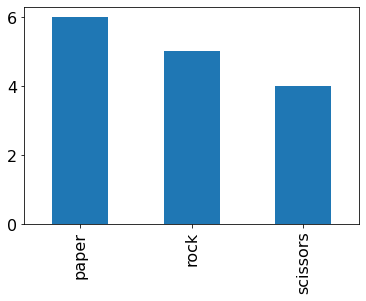

In [15]:
s = Series(choice(["rock", "paper", "scissors"], size=15))
vc = s.value_counts()
vc
vc.plot.bar()

----
### Sort by item

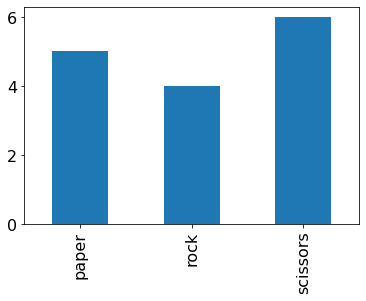

In [16]:
s = Series(choice(["rock", "paper", "scissors"], size=15))
vc = s.value_counts()
vc = vc.sort_index()
vc.plot.bar()


----
### Sorted as "rock", "paper", "scissors"

rock        4
paper       5
scissors    6
dtype: int64


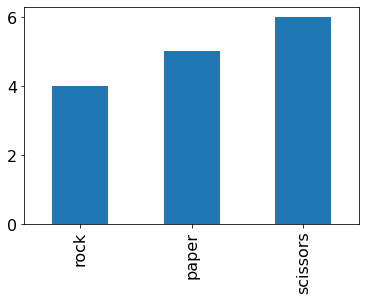

In [17]:
s = Series(choice(["rock", "paper", "scissors"], size=15))
vc = s.value_counts()
vc = vc[ ["rock", "paper", "scissors"] ]
print(vc)
vc.plot.bar()

----
### Is this really fair? 

rock        1000476
paper        999167
scissors    1000357
dtype: int64


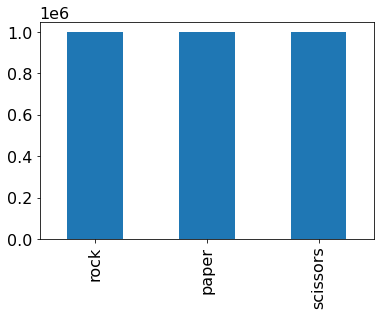

In [18]:
s = Series(choice(["rock", "paper", "scissors"], size=3000000))
vc = s.value_counts()
vc = vc[ ["rock", "paper", "scissors"] ]
print(vc)
vc.plot.bar()

----
### Control the probability of selection

rock         29905
paper        59932
scissors    210163
dtype: int64


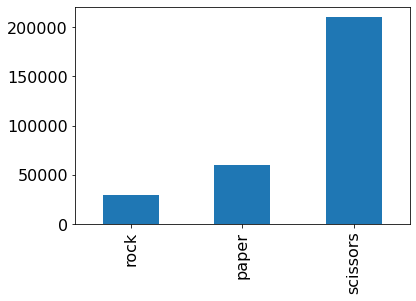

In [19]:
s = Series(choice(["rock", "paper", "scissors"], size=300000, p=[0.10, 0.20, 0.70]))
vc = s.value_counts()
vc = vc[ ["rock", "paper", "scissors"] ]
print(vc)
vc.plot.bar()

----
### Random integer shortcut

In [20]:
Series(choice(6, size=5,))

0    1
1    0
2    1
3    4
4    3
dtype: int32

----
### Back to PowerPoint to talk about Bugs

----
### Change over time

0    9
1    5
2    9
3    1
4    2
dtype: int32


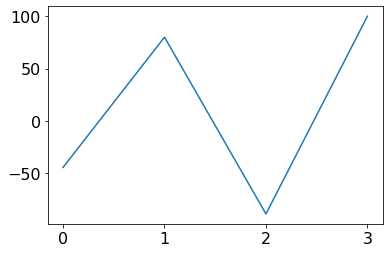

In [21]:
# Change over time
s = Series(choice(10,size=5))
percents = []
for i in range(1, len(s)):
    diff = 100 * (s[i] / s[i-1] -1)
    percents.append(diff)
print(s)
Series(percents).plot.line()

----
### Back to PowerPoint again - more about Bugs

----
### Seeding

In [22]:
np.random.seed(220)
choice(1000, size=3)

array([883, 732,  15])

In [23]:
choice(1000, size=3)

array([180, 120, 514])

In [24]:
np.random.seed(220)
choice(1000, size=6)

array([883, 732,  15, 180, 120, 514])

In [25]:
choice(1000, size=3)

array([112, 626,  27])

----
### Seeding with time

In [26]:
import time
time.time()
now = int(time.time())
now
np.random.seed(now)
choice(1000, size=3)
print("Seeding with:", now)

Seeding with: 1588336361


----
### Significance - Does the data support drawing that conclusion?

----
### Is it weird that we have 60 heads, 40 tails? How often are we +- 10 of the expected

In [27]:
trials = 10
flips = 3
df = DataFrame(choice(["H","T"], size = (trials, flips)))
df

,0,1,2
0,T,T,T
1,H,H,H
2,H,T,H
3,T,H,H
4,T,H,H
5,T,T,T
6,T,T,H
7,T,T,H
8,T,H,H
9,T,H,H


In [28]:
trials = 10
flips = 3
df = DataFrame(choice([1,0], size = (trials, flips)))
df

,0,1,2
0,1,0,0
1,0,1,0
2,1,0,1
3,1,0,0
4,0,1,1
5,0,0,1
6,1,1,0
7,0,0,0
8,0,1,1
9,0,1,0


In [29]:
trials = 10
flips = 3
df = DataFrame(choice([1,0], size = (trials, flips)))
print(df)
df.sum(axis=1)

   0  1  2
0  1  1  0
1  1  1  0
2  0  0  0
3  1  0  0
4  1  0  0
5  0  1  0
6  1  1  1
7  0  1  0
8  0  1  1
9  1  1  1


0    2
1    2
2    0
3    1
4    1
5    1
6    3
7    1
8    2
9    3
dtype: int64

In [30]:
trials = 10000
flips = 100
df = DataFrame(choice([1,0], size = (trials, flips)))
print(df)
counts = df.sum(axis=1)
counts

      0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  96  \
0      1   0   1   0   1   1   1   1   0   0  ...   1   1   0   0   0   1   1   
1      1   1   0   0   0   0   0   1   1   0  ...   0   1   1   0   1   0   1   
2      0   1   0   1   1   1   0   0   0   1  ...   1   1   1   1   1   1   1   
3      0   1   1   1   0   0   0   1   0   1  ...   0   0   1   1   0   1   0   
4      1   1   0   1   1   0   0   0   0   1  ...   0   0   1   1   1   1   1   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
9995   0   1   1   1   1   0   1   0   1   1  ...   0   1   0   1   0   0   0   
9996   0   1   1   0   0   1   1   0   0   0  ...   1   0   0   1   1   1   1   
9997   0   0   1   1   0   1   0   1   1   0  ...   0   0   1   0   0   0   1   
9998   1   0   1   0   0   0   1   0   0   1  ...   1   0   1   1   1   1   0   
9999   1   1   1   0   0   1   0   0   0   0  ...   0   0   1   0   1   0   1   

      97  98  99  
0      1

0       52
1       54
2       50
3       55
4       46
        ..
9995    54
9996    52
9997    51
9998    43
9999    40
Length: 10000, dtype: int64

In [31]:
counts<=40
counts>=60
extremes = counts[(counts<=40) | (counts >=60)]
len(extremes)
len(extremes) / trials *100

5.319999999999999

----
### Opening example with the 16 coins - How often do we get 11 or more heads?

In [32]:
flips = 16
trials = 10000
df = DataFrame(choice([1, 0], size = (trials, flips)))
counts = df.sum(axis=1)
result = counts[counts >= 11]
len(result) / trials *100

10.72

----
### How often do we see 7 heads in a row out of 16 coins

In [64]:
seven_or_more = 0
trials = 10000
for i in range(trials):
    s = "".join(choice(["H","T"], size=16))
    if s.find("HHHHHHH") != -1:
        seven_or_more += 1
seven_or_more / trials * 445 

17.6665